<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

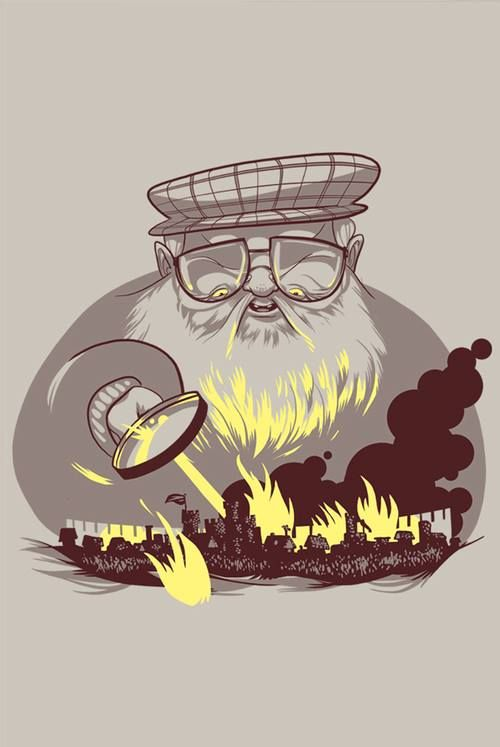

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 70.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 82.9MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [76]:
#  Импортируем библиотеки pandas, matplotlib, seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [77]:
data = pd.read_csv('game_of_thrones_train.csv', index_col = 'S.No')

In [78]:
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [79]:
# ...#Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
 #      'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
  #     'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
   #    'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
    #   'isAlive'],
     # dtype='object')

drop_column_list = [ 'mother','father', 'heir', 'spouse', 
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse' ]
data.drop(columns=drop_column_list, inplace=True)

In [80]:
for column_name, column_data in data.items():
    na_percentage = round((column_data.isna().sum() / len(column_data)) * 100, 3)
    print(f'{column_name}: {na_percentage} % пропущенных данных')

name: 0.0 % пропущенных данных
title: 53.95 % пропущенных данных
male: 0.0 % пропущенных данных
culture: 68.658 % пропущенных данных
dateOfBirth: 82.081 % пропущенных данных
house: 24.47 % пропущенных данных
book1: 0.0 % пропущенных данных
book2: 0.0 % пропущенных данных
book3: 0.0 % пропущенных данных
book4: 0.0 % пропущенных данных
book5: 0.0 % пропущенных данных
isMarried: 0.0 % пропущенных данных
isNoble: 0.0 % пропущенных данных
age: 82.081 % пропущенных данных
numDeadRelations: 0.0 % пропущенных данных
popularity: 0.0 % пропущенных данных
isAlive: 0.0 % пропущенных данных


In [81]:
data['title'] = data['title'].fillna('Rare')

In [82]:
# Обрабатываем строки, где house равно NaN
data['house'] = data.apply(lambda row: 'House ' + row['name'].split()[-1] if pd.isna(row['house']) else row['house'], axis=1)

# Проверяем результат
print(data[['name', 'house']])


                      name              house
S.No                                         
1     Viserys II Targaryen    House Targaryen
2              Walder Frey         House Frey
3             Addison Hill        House Swyft
4              Aemma Arryn        House Arryn
5           Sylva Santagar     House Santagar
...                    ...                ...
1553                Marwyn       House Marwyn
1554          Masha Heddle       House Heddle
1555      Matthos Seaworth     House Seaworth
1556            Meera Reed         House Reed
1557    Melara Hetherspoon  House Hetherspoon

[1557 rows x 2 columns]


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [83]:
data['isPopular'] = np.where(data['popularity'] >= 0.5, 1.0, 0.0)

drop_column_list = ['popularity']
data.drop(columns=drop_column_list, inplace=True)




In [84]:


data['boolDeadRelations'] = np.where(data['numDeadRelations'] > 0, 1.0, 0.0)

data[['boolDeadRelations','numDeadRelations']]
drop_column_list = ['numDeadRelations']
data.drop(columns=drop_column_list, inplace=True)
data

,name,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Rare,1,NaN,NaN,House Targaryen,0,0,0,0,0,0,0,NaN,0,1.0,1.0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,House Frey,1,1,1,1,1,1,1,97.0,1,1.0,1.0
3,Addison Hill,Ser,1,NaN,NaN,House Swyft,0,0,0,1,0,0,1,NaN,1,0.0,0.0
4,Aemma Arryn,Queen,0,NaN,82.0,House Arryn,0,0,0,0,0,1,1,23.0,0,0.0,0.0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,0,0,0,1,0,1,1,29.0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,House Marwyn,1,0,1,1,0,0,1,NaN,1,0.0,0.0
1554,Masha Heddle,Rare,0,NaN,NaN,House Heddle,1,1,0,0,0,0,0,NaN,0,0.0,0.0
1555,Matthos Seaworth,Rare,1,NaN,NaN,House Seaworth,0,1,1,1,1,0,0,NaN,0,0.0,0.0


In [85]:
# Заполняем пропущенные значения 'Outliers'
data['culture'] = data['culture'].fillna('Outliers')

# Подсказка: сопоставление культур со словаря
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

# Переворачиваем словарь для обратного поиска (для сопоставления строк с категориями)
reverse_cult = {alias: key for key, aliases in cult.items() for alias in aliases}

# Применяем преобразование культур на основе словаря
data['culture'] = data['culture'].apply(lambda x: reverse_cult[x.lower()] if x.lower() in reverse_cult else x)

# Считаем частоту появления каждой категории после преобразования
culture_counts = data['culture'].value_counts()

# Функция для присвоения кластеров на основе частоты
def assign_cluster(count):
    if count <= 15:
        return 1
    elif count <= 30:
        return 2
    elif count <= 60:
        return 3
    else:
        return 4

# Присваиваем кластеры на основе частоты появления категорий
data['culture'] = data['culture'].map(lambda x: assign_cluster(culture_counts[x]))

# Проверим результат
print(data[['culture']].head())


      culture
S.No         
1           4
2           1
3           4
4           4
5           2


In [86]:


# Добавляем новую фичу: сумма года рождения и возраста равна 305
data['sum_is_305'] = ((data['dateOfBirth'] + data['age']) == 305).astype(int)

# Удаляем столбцы 'dateOfBirth' и 'age'
data.drop(columns=['dateOfBirth', 'age'], inplace=True)

# Проверяем результат
print(data.head())


                      name                 title  male  culture  \
S.No                                                              
1     Viserys II Targaryen                  Rare     1        4   
2              Walder Frey  Lord of the Crossing     1        1   
3             Addison Hill                   Ser     1        4   
4              Aemma Arryn                 Queen     0        4   
5           Sylva Santagar            Greenstone     0        2   

                house  book1  book2  book3  book4  book5  isMarried  isNoble  \
S.No                                                                           
1     House Targaryen      0      0      0      0      0          0        0   
2          House Frey      1      1      1      1      1          1        1   
3         House Swyft      0      0      0      1      0          0        1   
4         House Arryn      0      0      0      0      0          1        1   
5      House Santagar      0      0      0      1 

In [90]:
# Ваш список уникальных значений столбца 'title'
unique_titles = data['title'].unique()

# Определяем кластеры по значимости и статусности
cluster_mapping = {
    1: ['King', 'Queen', 'Emperor', 'King in the North', 'King-Beyond-the-Wall',
        'Protector of the Realm', 'Prince of Dragonstone', 'Prince of Winterfell',
        'Prince of Dorne', 'King of the Andals', 'King of the Iron Islands', 'King of Astapor',
        'Lord Paramount of the Trident', 'Lord of the Seven Kingdoms'],
    
    2: ['Hand of the King', 'Lord Commander', 'Grand Maester', 'High Septon', 'Lord',
        'Lady', 'Lord Reaper of Pyke', 'Lord of the Crossing', 'Lord Steward', 'Lady of Darry',
        'Lord of Dragonstone', 'Lord of Winterfell', 'Lord of Casterly Rock', 'Lord of Highgarden',
        'Lord of Riverrun', 'Lady of Winterfell', 'Queen Regent', 'Queen Dowager',
        'Prince', 'Princess', 'Prince of Dragonstone'],
    
    3: ['Ser', 'Knight', 'Maester', 'Septon', 'Septa', 'Captain', 'Commander', 'Castellan',
        'Master-at-Arms', 'First Ranger', 'Master of Coin', 'Master of Whisperers', 'Steward',
        'Magister', 'Khal', 'Khalakka', 'Bloodrider', 'Cupbearer', 'Good Master', 'Oarmaster',
        'Master of Ships', 'Master of Laws', 'Captain of the Guard', 'Master of Deepwood Motte',
        'First Sword of Braavos', 'Chief Undergaoler', 'Commander of the Second Sons'],
    
    4: ['Goodman', 'Goodwife', 'Brother', 'Sister', 'Tradesman-Captain', 'Undergaoler', 'Wraith',
        'BrotherProctor', 'Red Priest', 'Servant', 'Commoner', 'Hedge Knight', 'Freerider',
        'Sellsword', 'Salt Shore', 'Sandstone'],
    
    5: ['Rare', 'Unknown', 'Other', 'Miscellaneous', 'Unspecified', 'Red Flower Vale',
        'Blue Grace', 'Big BucketThe Wull', 'Lady Marya', 'LadyQueen', 'QueenBlack Bride']
}

# Создаём обратное сопоставление титулов и кластеров
title_to_cluster = {}
for cluster, titles in cluster_mapping.items():
    for title in titles:
        title_to_cluster[title.lower()] = cluster  # Приводим к нижнему регистру для нечувствительности к регистру

# Функция для присвоения кластера по титулу
def assign_title_cluster(title):
    if pd.isna(title):
        return 5  # Если значение отсутствует, присваиваем кластер 5
    title_lower = title.lower()
    if title_lower in title_to_cluster:
        return title_to_cluster[title_lower]
    else:
        return 5  # Присваиваем кластер 5 для неизвестных титулов

# Применяем функцию к столбцу 'title' и перезаписываем его номерами кластеров
data['title'] = data['title'].apply(assign_title_cluster)

# Проверяем результат
print(data['title'].value_counts())


title
5    1056
3     400
2      62
1      26
4      13
Name: count, dtype: int64


In [94]:
# Считаем частоту появления каждой категории после преобразования
culture_counts = data['house'].value_counts()

# Функция для присвоения кластеров на основе частоты
def assign_cluster(count):
    if count <= 15:
        return 1
    elif count <= 30:
        return 2
    elif count <= 60:
        return 3
    else:
        return 4

# Присваиваем кластеры на основе частоты появления категорий
data['house'] = data['house'].map(lambda x: assign_cluster(culture_counts[x]))

# Проверим результат
print(data[['house']].head())

      house
S.No       
1         4
2         4
3         4
4         4
5         4


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
df.drop(columns=['name'], inplace=True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

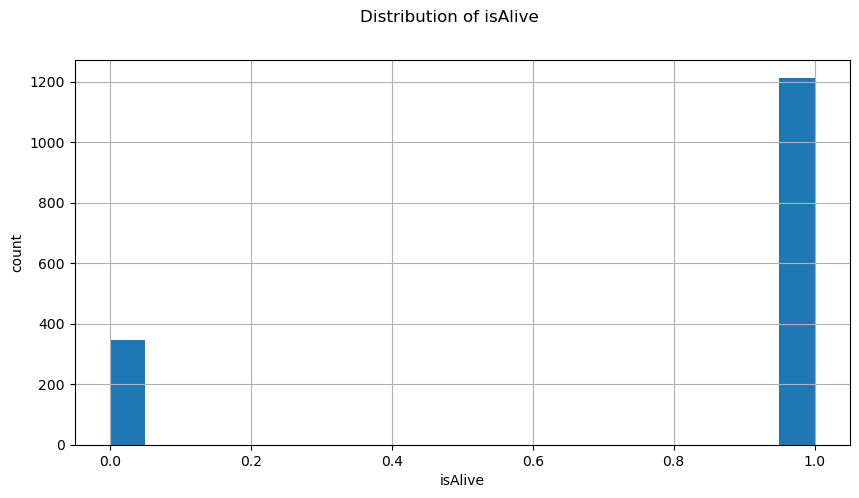

In [97]:
# ...


plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('isAlive')

plt.suptitle('Distribution of isAlive')
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

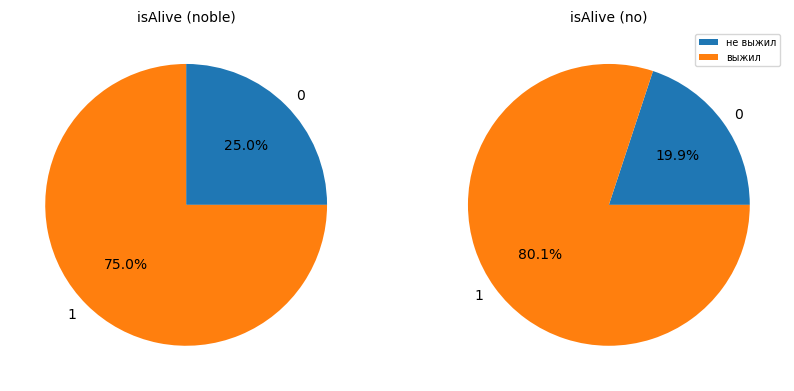

In [98]:
# Строим боксплот
# Готовим данные для графика



# female - 0, male - 1
data_1 = data[data['isNoble']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['isNoble']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('isAlive (noble)', fontsize=10)
ax2.set_title('isAlive (no)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

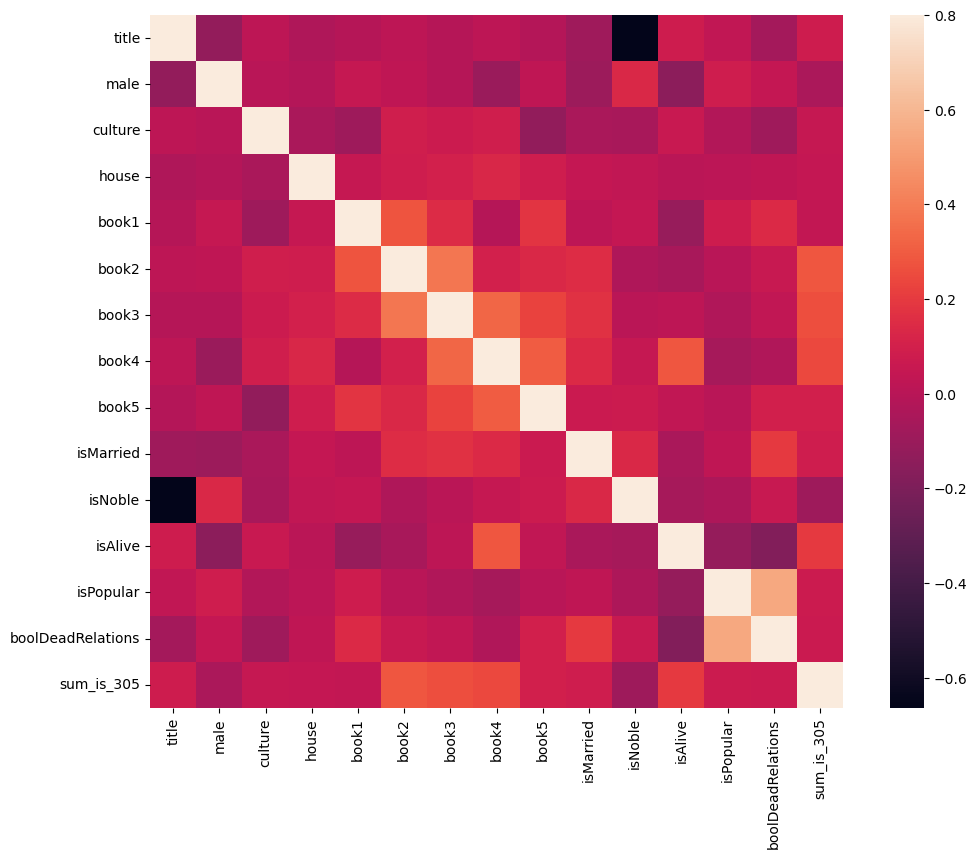

In [99]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [101]:
X = data.drop(columns=['isAlive']).values
y = data['isAlive'].values


**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2 ,shuffle = True)

In [104]:
scaler = StandardScaler()
scaler.fit(X_train)
# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test_scaled)



# Шаг 1. создание модели
adaboost_classifier =  AdaBoostClassifier()

# Шаг 2. обучение модели
adaboost_classifier.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = adaboost_classifier.predict(X_test_scaled)



# Шаг 1. создание модели
RandomForest_classifier =  RandomForestClassifier()

# Шаг 2. обучение модели
RandomForest_classifier.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = RandomForest_classifier.predict(X_test_scaled)





# Шаг 1. создание модели
gaussp_classifier = GaussianProcessClassifier()

# Шаг 2. обучение модели
gaussp_classifier.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = gaussp_classifier.predict(X_test_scaled)



# Шаг 1. создание модели
Gaussian_NB =  GaussianNB()

# Шаг 2. обучение модели
Gaussian_NB.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = Gaussian_NB.predict(X_test_scaled)



# Шаг 1. создание модели
KNN =  KNeighborsClassifier()

# Шаг 2. обучение модели
KNN.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = KNN.predict(X_test_scaled)




# Шаг 1. создание модели
SVC =  SVC()

# Шаг 2. обучение модели
SVC.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = SVC.predict(X_test_scaled)


# Шаг 1. создание модели
DTC =  DecisionTreeClassifier()

# Шаг 2. обучение модели
DTC.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = DTC.predict(X_test_scaled)


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [106]:
from sklearn.metrics import accuracy_score


# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)






# Шаг 3. Предсказание на тестовых данных
y_pred = adaboost_classifier.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)




# Шаг 3. Предсказание на тестовых данных
y_pred = RandomForest_classifier.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)




# Шаг 3. Предсказание на тестовых данных
y_pred = gaussp_classifier.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)





# Шаг 3. Предсказание на тестовых данных
y_pred = Gaussian_NB.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)






# Шаг 3. Предсказание на тестовых данных
y_pred = KNN.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)





# Шаг 3. Предсказание на тестовых данных
y_pred = SVC.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)



# Шаг 3. Предсказание на тестовых данных
y_pred = DTC.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)


Accuracy : 0.8013
Accuracy : 0.7853
Accuracy : 0.7917
Accuracy : 0.8013
Accuracy : 0.3365
Accuracy : 0.7949
Accuracy : 0.8045
Accuracy : 0.7821


Теперь делаем все тоже самое только для TEST

In [109]:
data = pd.read_csv('game_of_thrones_test.csv', index_col = 'S.No')

data.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity'],
      dtype='object')

In [110]:
# ...#Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
 #      'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
  #     'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
   #    'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
    #   'isAlive'],
     # dtype='object')

drop_column_list = [ 'mother','father', 'heir', 'spouse', 
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse' ]
data.drop(columns=drop_column_list, inplace=True)

In [111]:
data['title'] = data['title'].fillna('Rare')




# Обрабатываем строки, где house равно NaN
data['house'] = data.apply(lambda row: 'House ' + row['name'].split()[-1] if pd.isna(row['house']) else row['house'], axis=1)

# Проверяем результат
print(data[['name', 'house']])






data['isPopular'] = np.where(data['popularity'] >= 0.5, 1.0, 0.0)

drop_column_list = ['popularity']
data.drop(columns=drop_column_list, inplace=True)







data['boolDeadRelations'] = np.where(data['numDeadRelations'] > 0, 1.0, 0.0)

data[['boolDeadRelations','numDeadRelations']]
drop_column_list = ['numDeadRelations']
data.drop(columns=drop_column_list, inplace=True)





# Заполняем пропущенные значения 'Outliers'
data['culture'] = data['culture'].fillna('Outliers')

# Подсказка: сопоставление культур со словаря
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

# Переворачиваем словарь для обратного поиска (для сопоставления строк с категориями)
reverse_cult = {alias: key for key, aliases in cult.items() for alias in aliases}

# Применяем преобразование культур на основе словаря
data['culture'] = data['culture'].apply(lambda x: reverse_cult[x.lower()] if x.lower() in reverse_cult else x)

# Считаем частоту появления каждой категории после преобразования
culture_counts = data['culture'].value_counts()

# Функция для присвоения кластеров на основе частоты
def assign_cluster(count):
    if count <= 15:
        return 1
    elif count <= 30:
        return 2
    elif count <= 60:
        return 3
    else:
        return 4

# Присваиваем кластеры на основе частоты появления категорий
data['culture'] = data['culture'].map(lambda x: assign_cluster(culture_counts[x]))

# Проверим результат
print(data[['culture']].head())









# Добавляем новую фичу: сумма года рождения и возраста равна 305
data['sum_is_305'] = ((data['dateOfBirth'] + data['age']) == 305).astype(int)

# Удаляем столбцы 'dateOfBirth' и 'age'
data.drop(columns=['dateOfBirth', 'age'], inplace=True)

# Проверяем результат
print(data.head())









# Ваш список уникальных значений столбца 'title'
unique_titles = data['title'].unique()

# Определяем кластеры по значимости и статусности
cluster_mapping = {
    1: ['King', 'Queen', 'Emperor', 'King in the North', 'King-Beyond-the-Wall',
        'Protector of the Realm', 'Prince of Dragonstone', 'Prince of Winterfell',
        'Prince of Dorne', 'King of the Andals', 'King of the Iron Islands', 'King of Astapor',
        'Lord Paramount of the Trident', 'Lord of the Seven Kingdoms'],
    
    2: ['Hand of the King', 'Lord Commander', 'Grand Maester', 'High Septon', 'Lord',
        'Lady', 'Lord Reaper of Pyke', 'Lord of the Crossing', 'Lord Steward', 'Lady of Darry',
        'Lord of Dragonstone', 'Lord of Winterfell', 'Lord of Casterly Rock', 'Lord of Highgarden',
        'Lord of Riverrun', 'Lady of Winterfell', 'Queen Regent', 'Queen Dowager',
        'Prince', 'Princess', 'Prince of Dragonstone'],
    
    3: ['Ser', 'Knight', 'Maester', 'Septon', 'Septa', 'Captain', 'Commander', 'Castellan',
        'Master-at-Arms', 'First Ranger', 'Master of Coin', 'Master of Whisperers', 'Steward',
        'Magister', 'Khal', 'Khalakka', 'Bloodrider', 'Cupbearer', 'Good Master', 'Oarmaster',
        'Master of Ships', 'Master of Laws', 'Captain of the Guard', 'Master of Deepwood Motte',
        'First Sword of Braavos', 'Chief Undergaoler', 'Commander of the Second Sons'],
    
    4: ['Goodman', 'Goodwife', 'Brother', 'Sister', 'Tradesman-Captain', 'Undergaoler', 'Wraith',
        'BrotherProctor', 'Red Priest', 'Servant', 'Commoner', 'Hedge Knight', 'Freerider',
        'Sellsword', 'Salt Shore', 'Sandstone'],
    
    5: ['Rare', 'Unknown', 'Other', 'Miscellaneous', 'Unspecified', 'Red Flower Vale',
        'Blue Grace', 'Big BucketThe Wull', 'Lady Marya', 'LadyQueen', 'QueenBlack Bride']
}

# Создаём обратное сопоставление титулов и кластеров
title_to_cluster = {}
for cluster, titles in cluster_mapping.items():
    for title in titles:
        title_to_cluster[title.lower()] = cluster  # Приводим к нижнему регистру для нечувствительности к регистру

# Функция для присвоения кластера по титулу
def assign_title_cluster(title):
    if pd.isna(title):
        return 5  # Если значение отсутствует, присваиваем кластер 5
    title_lower = title.lower()
    if title_lower in title_to_cluster:
        return title_to_cluster[title_lower]
    else:
        return 5  # Присваиваем кластер 5 для неизвестных титулов

# Применяем функцию к столбцу 'title' и перезаписываем его номерами кластеров
data['title'] = data['title'].apply(assign_title_cluster)

# Проверяем результат
print(data['title'].value_counts())






# Считаем частоту появления каждой категории после преобразования
culture_counts = data['house'].value_counts()

# Функция для присвоения кластеров на основе частоты
def assign_cluster(count):
    if count <= 15:
        return 1
    elif count <= 30:
        return 2
    elif count <= 60:
        return 3
    else:
        return 4

# Присваиваем кластеры на основе частоты появления категорий
data['house'] = data['house'].map(lambda x: assign_cluster(culture_counts[x]))

# Проверим результат
print(data[['house']].head())

                   name                        house
S.No                                                
1558  Melissa Blackwood              House Blackwood
1559         Melisandre                      R'hllor
1560             Merrit  Brotherhood without banners
1561        Meryn Trant                  House Trant
1562       Merrett Frey                   House Frey
...                 ...                          ...
1942              Luwin                  House Stark
1943               Reek                 House Bolton
1944   Symeon Star-Eyes              House Star-Eyes
1945          Coldhands              Three-eyed crow
1946    Tytos Lannister              House Lannister

[389 rows x 2 columns]
      culture
S.No         
1558        4
1559        1
1560        4
1561        4
1562        1
                   name title  male  culture                        house  \
S.No                                                                        
1558  Melissa Blackwood  Rare     0

In [113]:
data.drop(columns=['name'], inplace=True)

In [115]:
X = data.values



In [120]:
scaler = StandardScaler()
scaler.fit(X)
# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X_train_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X)

In [121]:
y_pred =  SVC.predict(X_train_scaled)



submission = pd.read_csv("submission.csv", index_col='S.No')


submission['isAlive'] = y_pred



In [122]:



submission.to_csv("new_submission.csv", index=False)

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.42MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)